딥러닝의 핵심은 가중치 변경에 있다.

딥러닝의 가중치 변경 방법을 **오차 역전파(Back Propagation)**라고 한다.

오차에 대한 함수를 만들고, 경사하강법을 통해 오차가 최소인 지점으로 parameter를 보정해주는 것을 반복한다. 그런데 이런 수정 과정을 입력층부터가 아닌 출력층부터 시작해서 은닉층, 입력층까지 가므로, 이걸 오차 역전파라고 이름붙이게 된다.

1. 임의의 초기 가중치 W로 결과 y를 계산한다.
2. 계산 결과 우리가 원하는 값에 대한 오차를 구한다.
3. 경사 하강법을 통해 오차가 작아지는 방향으로 parameter를 업데이트한다.
4. 일정 범위에 오차가 들어올 때까지 반복 (=오차 함수에 대한 미분값이 0이 될 때까지 = 가중치에서 기울기를 빼도 값의 변화가 없을 때까지)

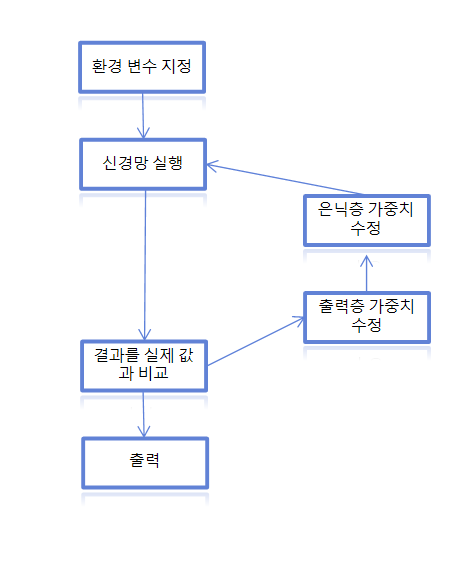

이미 구현된 라이브러리가 아닌 실제 쌩 코드를 통해서 XOR 문제를 어떻게 풀이하는 지 알아보자.

오차 역전파는 Y값에서 거꾸로 거슬러 올라가며 모든 노드에서의 가중치가 더이상 업데이트 안될 때까지 반복해서 계산하는 것이다.

공식은 대략 이러하다.

$$W(t+1) = W(t) - \frac{\partial Error_{Y}}{\partial W}$$
t는 현재단계고, t+1은 다음 단계를 의미한다.
그리고 우리가 구해야하는 값은 $\frac{dError_{Y}}{dW}$이다.

----

그럼 오차 공식은 어떻게 구하나?
$Y$의 오차는 $y_1$의 오차와 $y_2$의 오차의 합이다.
평균 제곱 오차를 이용해서 구하면
Error of $y_1 = \frac{(y_{t1}-y_1)^2}{2}$
Error of $y_2 = \frac{(y_{t2}-y_2)^2}{2}$ 
여기서 $y_t$은 실제로 주어진 데이터를 통해서 구한 값이다. 즉 우리의 목표치(target)이다.
총합하면
Error of $y = \frac{(y_{t1}-y_1)^2}{2}+ \frac{(y_{t2}-y_2)^2}{2}$

----

체인룰을 이용해서 각 파라미터에 대한 오차에 대한 편미분 값을 계산하자. 예를 들어 $w_{31}$를 구한다고 하면,
$\frac{\partial Error_{Y}}{\partial w_{31}} = \frac{\partial Error_{Y}}{\partial y_1} \times \frac{\partial y_1}{\partial 가중합} \times \frac{\partial 가중합}{\partial w_{31}}$이 된다.

각각의 편미분 값을 구하면,
$\frac{\partial Error_{Y}}{\partial y_1} = y_1 - y_t1$이고,

$\frac{\partial y_1}{\partial 가중합} = 활성화함수의 미분$이므로,
sigmoid함수의 경우, 그 미분값이 $\sigma (x) (1 - \sigma (x))$이므로
$\frac{\partial y_1}{\partial 가중합} = 활성화함수의 미분 = y_1(1 - y_1)$

그리고 가중합 = $w_{31}y_{h1} + w_{41}y_{h2} + bias$이다.

$\frac{\partial 가중합}{\partial w_{31}} = y_h1$이다...

따라서
$\frac{\partial Error_{Y}}{\partial w_{31}} = \frac{\partial Error_{Y}}{\partial y_1} \times \frac{\partial y_1}{\partial 가중합} \times \frac{\partial 가중합}{\partial w_{31}} = (y_1 - y_t1) y_1(1 - y_1)y_h1$이다.

이걸 가중치 업데이트 식에 그대로 넣어주면된다.
그리고 $(y_r - y)y(1-y)$이 식을 노드의 delta 식이라고 한다. 이 식을 이용해서 iteration equation을 만들어서 그대로 오차를 구하는 것을 반복할 수 있다.

그러면 공식이$$W(t+1) = W(t) - \delta yy_{h1}$$

앞서는 출력층에서의 오차를 업데이트 했다. 이번에는 은닉층의 오차가 업데이트 되는 과정을 보자.

앞에서와 똑같이, 은닉층에서의 가중치에 이 식을 적용한다.
$$W(t+1) = W(t) - \frac{\partial Error_{Y}}{\partial W}$$

주의해야할 점은 $Y_h$가 아니라 $Y$인 점이다. $Y_h$는 출력되지 않으므로 사용할 수 없다.

이번에는 체인룰을 적용할 때 $y_h1$을 통해서 미분해야한다.

$\frac{\partial Error_{Y}}{\partial w_{11}} = \frac{\partial Error_{Y}}{\partial y_h1} \times \frac{\partial y_h1}{\partial 가중합} \times \frac{\partial 가중합}{\partial w_{11}}$로 계산하면 되겠다.

이전과 같은 방법을 이용하면 $\frac{\partial y_h1}{\partial 가중합} \times \frac{\partial 가중합}{\partial w_{11}} = y_{h1}(1 - y_{h1})x_1$이다.

$\frac{\partial Error_{Y}}{\partial y_h1} = \frac{\partial Error_{y_1 + y_2}}{\partial y_h1} = \frac{\partial Error_{y_1}}{\partial y_h1} + \frac{\partial Error_{y_2}}{\partial y_h1}$인데,

$\frac{\partial Error_{y_1}}{\partial y_h1} = \frac{\partial Error_{y_1}}{\partial 가중합} \times \frac{\partial 가중합}{\partial y_h1}$이고, $\frac{\partial Error_{y_1}}{\partial 가중합}=\frac{\partial Error_{y_1}}{\partial y_1} \times \frac{\partial y_1}{\partial 가중합}$

이를 그대로 식을 구해주면
$\frac{\partial Error_{y_1}}{\partial y_h1} = (y_1-y_{t1})y_1(1-y_1)w_{31}$

여기서 $ (y_1-y_{t1})y_1(1-y_1) = \delta$이므로, $(y_1-y_{t1})y_1(1-y_1)w_{31} = \delta (y_1) w_{31}$이 된다.

같은 과정을 거치면 $\frac{\partial Error_{y_2}}{\partial y_h1} = (y_2-y_{t2})y_2(1-y_2)w_{41} = \delta (y_2) w_{41}$이 된다.

따라서 $\frac{\partial Error_{y_1}}{\partial y_h1} = \delta (y_1) w_{31} + \delta (y_2) w_{41}$

$\frac{\partial Error_{Y}}{\partial w_{11}} = (\delta (y_1) w_{31} + \delta (y_2) w_{41})y_{h1}(1-y_{h1})x_1$이 된다.

출력층의 오차 업데이트 = $(y_1 - y_t1) y_1(1 - y_1)y_h1$

은닉층의 오차 업데이트 = $(\delta (y_1) w_{31} + \delta (y_2) w_{41})y_{h1}(1-y_{h1})x_1$

$(y_1-y_{t1})$와 $(\delta (y_1) w_{31} + \delta (y_2) w_{41})$은 모두 오차를 의미한다.

그리고 두 식 모두 오차*out*(1-out) 형식을 띈다.

즉 은닉층의 가중치 업데이트는
$$w_{11}(t+1) = w_{11}(t) - \delta (h)x_1$$

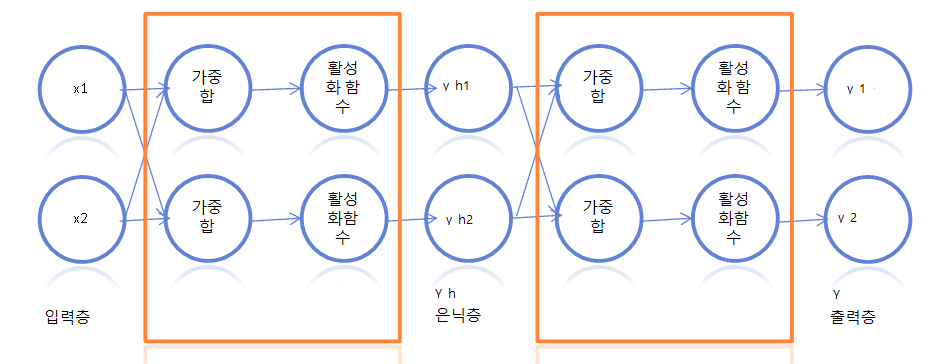

코드를 하나씩 분석하기는 했지만 그럴 필요가 있나 싶다.
그냥 알고리즘만 파악하는 느낌으로 보자.

In [2]:
# 실제로 XOR 연산을 표현하는 parameter를 구하는 과정
# 랜덤하게 초기화된 가중치가 XOR과 똑같이 조정되는 지 확인하자.

import random
import numpy as np

random.seed(777)

# 환경 변수 지정

# 입력값 및 타겟값
# XOR 연산의 진리표
data = [
    [[0, 0], [0]],
    [[0, 1], [1]],
    [[1, 0], [1]],
    [[1, 1], [0]]
]

# 실행 횟수(iterations), 학습률(lr), 모멘텀 계수(mo) 설정
iterations=5000
lr=0.1
mo=0.4

# 활성화 함수 - 1. 시그모이드
# 미분할 때와 아닐 때의 각각의 값을 표현할 수 있게한다.
# 기본값은 미분이 아닐 때의 값
def sigmoid(x, derivative=False):
    if (derivative == True):
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

# 활성화 함수 - 2. tanh
# tanh 함수의 미분은 1 - (활성화 함수 출력의 제곱)
def tanh(x, derivative=False):
    if (derivative == True):
        return 1 - x ** 2
    return np.tanh(x)

# 가중치 배열 만드는 함수
def makeMatrix(i, j, fill=0.0):
    mat = []
    for i in range(i):
        mat.append([fill] * j) #[fill]을 j만큼 반복한다
    return mat

# 신경망 클래스
class NeuralNetwork:

    # 생성자를 이용해 초깃값의 지정
    def __init__(self, num_x, num_yh, num_yo, bias=1):

        # 입력값(num_x), 은닉층 초깃값(num_yh), 출력층 초깃값(num_yo), 바이어스
        self.num_x = num_x + bias  # 바이어스는 1로 지정(본문 참조)
        self.num_yh = num_yh
        self.num_yo = num_yo

        # 활성화 함수 초깃값
        # 각자 노드 개수만큼 있다.
        self.activation_input = [1.0] * self.num_x
        self.activation_hidden = [1.0] * self.num_yh
        self.activation_out = [1.0] * self.num_yo

        # 가중치 입력 초깃값. 랜덤하게 한다.
        self.weight_in = makeMatrix(self.num_x, self.num_yh)
        for i in range(self.num_x):
            for j in range(self.num_yh):
                self.weight_in[i][j] = random.random()

        # 가중치 출력 초깃값. 랜덤하게 한다.
        self.weight_out = makeMatrix(self.num_yh, self.num_yo)
        for j in range(self.num_yh):
            for k in range(self.num_yo):
                self.weight_out[j][k] = random.random()

        # 모멘텀 SGD를 위한 이전 가중치 초깃값
        self.gradient_in = makeMatrix(self.num_x, self.num_yh)
        self.gradient_out = makeMatrix(self.num_yh, self.num_yo)

    # 업데이트 함수 : 입력층, 은닉층, 출력층의 모든 노드 값을 구한다.
    def update(self, inputs):

        # 입력 레이어의 활성화 함수까지 거친 결과값
        # input에는 real data의 input이 들어간다.
        # 입력층의 활성화 함수는 아무런 효과가 없다. 그냥 받은 거 그대로 내보낸다.
        for i in range(self.num_x - 1):
            self.activation_input[i] = inputs[i]

        # 은닉층의 활성화 함수까지 거친 결과값
        for j in range(self.num_yh):
            # 임시 변수
            sum = 0.0 
            # 가중합 구하기
            for i in range(self.num_x):
                sum = sum + self.activation_input[i] * self.weight_in[i][j]
            # 시그모이드와 tanh 중에서 활성화 함수 선택
            self.activation_hidden[j] = tanh(sum, False)

        # 출력층의 활성화 함수까지 거친 결과값
        for k in range(self.num_yo):
            # 임시 변수
            sum = 0.0 
            for j in range(self.num_yh):
                sum = sum + self.activation_hidden[j] * self.weight_out[j][k]
            # 시그모이드와 tanh 중에서 활성화 함수 선택
            self.activation_out[k] = tanh(sum, False)

        return self.activation_out[:]
    
    # 역전파의 실행. 각 층의 가중치가 변경된다.
    # 출력층 은닉층 입력층 순서대로 변경한다.
    def backPropagate(self, targets):

        # 출력층 델타값 계산
        output_deltas = [0.0] * self.num_yo
        for k in range(self.num_yo):
            error = targets[k] - self.activation_out[k]
            # 시그모이드와 tanh 중에서 활성화 함수 선택, 미분 적용
            # 오차 * 활성화함수 미분 계수 값
            output_deltas[k] = tanh(self.activation_out[k], True) * error

        # 은닉 노드의 오차 함수
        hidden_deltas = [0.0] * self.num_yh
        for j in range(self.num_yh):
            error = 0.0
            for k in range(self.num_yo):
                # 출력층과는 오차 계산 방법이 다르므로 식이 달라진다. p.336 참고
                error = error + output_deltas[k] * self.weight_out[j][k]
                # 시그모이드와 tanh 중에서 활성화 함수 선택, 미분 적용
                # 오차 * 활성화함수 미분 계수 값
            hidden_deltas[j] = tanh(self.activation_hidden[j], True) * error

        # 출력 가중치 업데이트
        for j in range(self.num_yh):
            for k in range(self.num_yo):
              # gradient가 오차를 가중치로 편미분한 것을 의미한다.
              # activation_hidden이 y_h1이 된다.
                gradient = output_deltas[k] * self.activation_hidden[j]
                # 모멘텀 SGD의 적용
                v = mo * self.gradient_out[j][k] - lr * gradient
                self.weight_out[j][k] += v
                # 방금 움직였던 방향은 gradient를 그대로 기록
                self.gradient_out[j][k] = gradient

        # 입력 가중치 업데이트. 출력 가중치 업데이트와 같은 방식으로 적용
        for i in range(self.num_x):
            for j in range(self.num_yh):
                gradient = hidden_deltas[j] * self.activation_input[i]
                v = mo*self.gradient_in[i][j] - lr * gradient
                self.weight_in[i][j] += v
                self.gradient_in[i][j] = gradient

        # 오차의 계산(최소 제곱법)
        error = 0.0
        for k in range(len(targets)):
            error = error + 0.5 * (targets[k] - self.activation_out[k]) ** 2
        return error

    # 학습 실행
    def train(self, patterns):
        for i in range(iterations):
            error = 0.0
            for p in patterns:
                inputs = p[0]
                targets = p[1]
                self.update(inputs)
                error = error + self.backPropagate(targets)
            if i % 500 == 0:
                print('error: %-.5f' % error)
    # 결괏값 출력
    def result(self, patterns):
        for p in patterns:
            print('Input: %s, Predict: %s' % (p[0], self.update(p[0])))

# 실제 실행부
if __name__ == '__main__':

    # 두 개의 입력 값, 두 개의 레이어, 하나의 출력 값을 갖도록 설정
    n = NeuralNetwork(2, 2, 1)

    # 학습 실행
    n.train(data)

    # 결괏값 출력
    n.result(data)


# Reference: http://arctrix.com/nas/python/bpnn.py (Neil Schemenauer)



error: 0.66537
error: 0.00263
error: 0.00088
error: 0.00051
error: 0.00036
error: 0.00027
error: 0.00022
error: 0.00018
error: 0.00016
error: 0.00014
Input: [0, 0], Predict: [0.0006183430577839138]
Input: [0, 1], Predict: [0.9889696478602483]
Input: [1, 0], Predict: [0.9889970505963888]
Input: [1, 1], Predict: [0.0021449252379751507]


오차 역전파를 이용하면 입력층에 가까워 질수록 보정해야하는 기울기의 값이 작어질 수밖에 없다. 애초에 기울기가 0이 되는 방향으로 parameter를 조정하기 때문에.

근본적으로는 활성화 함수로 사용되는 sigmoid함수의 미분 최대값이 0.3인 것도 있다.

그래서 다른 여러가지 활성화 함수를 도입한다.
$tanh(x), log(1+e^x), y=x(x>0)$

확률적 경사 하강법 Stochastic Gradient Descent SGD

계산량을 줄이고, 과적합이 되는 경우를 방지하기 위해, 랜덤하게 일부 데이터만을 이용해서 경사 하강법을 적용하는 것을 의미한다.

모멘텀 Momentum

Momentum SGD는 오차를 수정하기 전, 직전의 수정값의 부호/방향을 참고해서 같은 방향으로 일정한 비율만 수정되게 한다. 이를 통해서 parameter 수정 값의 방향이 자꾸 바뀌어 여러번 경사하강법을 적용해야하는 일을 피할 수 있다.

케라스에서 제공하는 경사하강법 종류

1. 확률적 경사 하강법 (SGD)

랜덤하게 추출한 일부 데이터를 사용해 더 빨리, 자주 업데이트를 하게 하는 것. 

keras.optimizers.SGD(lr = 0.1)

2. 모멘텀 (Momentum)

관성의 방향을 고려해 진동과 폭을 줄이는 효과

keras.optimizers.SGD(lr = 0.1, momentum= 0.9)

3. 네스테로프 모멘텀(NAG)

모멘텀이 이동시킬 방향으로 미리 이동해서 그레이디언트를 계산. 불필요한 이동을 줄이는 효과

keras.optimizers.SGD(lr = 0.1, momentum= 0.9, nesterov = True)

4. 아다그라드(Adagrad)

변수의 업데이트가 잦으면 학습률을 적게 하여 이동 보폭을 조절하는 방법

keras.optimizers.Adagrad(lr = 0.01, epsilon = 1e - 6)

**epsilon, rho, decay 같은 파라미터는 바꾸지 않고 그대로 사용하기를 권장**
**learning rate(학습률) 값만 적절히 조절**

5. 알엠에스프롭(RMSProp)

아다그라드의 보폭 민감도를 보완한 방법

keras.optimizers.RMSprop(lr = 0.001, rho = 0.9, epsilon = 1e - 08, decay = 0.0)

6. 아담(Adam)

모멘텀과 알엠에스프롭 방법을 합친 방법

keras.optimizers.Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e - 08, decay = 0.0)

In [ ]:
# Back-Propagation Neural Networks
# 
# Written in Python.  See http://www.python.org/
# Placed in the public domain.
# Neil Schemenauer <nas@arctrix.com>

import math
import random
import string

random.seed(0)

# calculate a random number where:  a <= rand < b
def rand(a, b):
    return (b-a)*random.random() + a

# Make a matrix (we could use NumPy to speed this up)
def makeMatrix(I, J, fill=0.0):
    m = []
    for i in range(I):
        m.append([fill]*J)
    return m

# our sigmoid function, tanh is a little nicer than the standard 1/(1+e^-x)
def sigmoid(x):
    return math.tanh(x)

# derivative of our sigmoid function, in terms of the output (i.e. y)
def dsigmoid(y):
    return 1.0 - y**2

class NN:
    def __init__(self, ni, nh, no):
        # number of input, hidden, and output nodes
        self.ni = ni + 1 # +1 for bias node
        self.nh = nh
        self.no = no

        # activations for nodes
        self.ai = [1.0]*self.ni
        self.ah = [1.0]*self.nh
        self.ao = [1.0]*self.no
        
        # create weights
        self.wi = makeMatrix(self.ni, self.nh)
        self.wo = makeMatrix(self.nh, self.no)
        # set them to random vaules
        for i in range(self.ni):
            for j in range(self.nh):
                self.wi[i][j] = rand(-0.2, 0.2)
        for j in range(self.nh):
            for k in range(self.no):
                self.wo[j][k] = rand(-2.0, 2.0)

        # last change in weights for momentum   
        self.ci = makeMatrix(self.ni, self.nh)
        self.co = makeMatrix(self.nh, self.no)

    def update(self, inputs):
        if len(inputs) != self.ni-1:
            raise ValueError('wrong number of inputs')

        # input activations
        for i in range(self.ni-1):
            #self.ai[i] = sigmoid(inputs[i])
            self.ai[i] = inputs[i]

        # hidden activations
        for j in range(self.nh):
            sum = 0.0
            for i in range(self.ni):
                sum = sum + self.ai[i] * self.wi[i][j]
            self.ah[j] = sigmoid(sum)

        # output activations
        for k in range(self.no):
            sum = 0.0
            for j in range(self.nh):
                sum = sum + self.ah[j] * self.wo[j][k]
            self.ao[k] = sigmoid(sum)

        return self.ao[:]


    def backPropagate(self, targets, N, M):
        if len(targets) != self.no:
            raise ValueError('wrong number of target values')

        # calculate error terms for output
        output_deltas = [0.0] * self.no
        for k in range(self.no):
            error = targets[k]-self.ao[k]
            output_deltas[k] = dsigmoid(self.ao[k]) * error

        # calculate error terms for hidden
        hidden_deltas = [0.0] * self.nh
        for j in range(self.nh):
            error = 0.0
            for k in range(self.no):
                error = error + output_deltas[k]*self.wo[j][k]
            hidden_deltas[j] = dsigmoid(self.ah[j]) * error

        # update output weights
        for j in range(self.nh):
            for k in range(self.no):
                change = output_deltas[k]*self.ah[j]
                self.wo[j][k] = self.wo[j][k] + N*change + M*self.co[j][k]
                self.co[j][k] = change
                #print N*change, M*self.co[j][k]

        # update input weights
        for i in range(self.ni):
            for j in range(self.nh):
                change = hidden_deltas[j]*self.ai[i]
                self.wi[i][j] = self.wi[i][j] + N*change + M*self.ci[i][j]
                self.ci[i][j] = change

        # calculate error
        error = 0.0
        for k in range(len(targets)):
            error = error + 0.5*(targets[k]-self.ao[k])**2
        return error


    def test(self, patterns):
        for p in patterns:
            print(p[0], '->', self.update(p[0]))

    def weights(self):
        print('Input weights:')
        for i in range(self.ni):
            print(self.wi[i])
        print()
        print('Output weights:')
        for j in range(self.nh):
            print(self.wo[j])

    def train(self, patterns, iterations=1000, N=0.5, M=0.1):
        # N: learning rate
        # M: momentum factor
        for i in range(iterations):
            error = 0.0
            for p in patterns:
                inputs = p[0]
                targets = p[1]
                self.update(inputs)
                error = error + self.backPropagate(targets, N, M)
            if i % 100 == 0:
                print('error %-.5f' % error)


def demo():
    # Teach network XOR function
    pat = [
        [[0,0], [0]],
        [[0,1], [1]],
        [[1,0], [1]],
        [[1,1], [0]]
    ]

    # create a network with two input, two hidden, and one output nodes
    n = NN(2, 2, 1)
    # train it with some patterns
    n.train(pat)
    # test it
    n.test(pat)



if __name__ == '__main__':
    demo()